## <div align="center"> UJIAN AKHIR SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> Convolutional Neural Network (CNN) Approach for Classification in Banana Leaf Diseases </div>

---
## Instruction

<ul>
    <li>Please make sure that <b>ALL</b> required submission files are submitted on the E-Learning.</li>
    <li>Please make sure to use <b>Markdown</b> as comment for the code you are writing</li>
    <li>Do not ZIP the submission files</li>
</ul>

## Caution
<ul>
    <li>We DOES NOT ACCEPT a submission via Gmail, Google Drive, Whatsapp, or any other than E-Learning</li>
    <li>We DOES NOT tolerate any plagriarism, etc.</li>
    <li>DO NOT change the order of this template.</li>
</ul>

---
### Group - 2

##### Members :
<ul>
    <li>1. Jackson Lawrence - 00000070612</li>
    <li>2. Louis Gabriel Hernandes - 00000070250</li>
    <li>3. Rich Marvin Lim - 00000079061</li>
    <li>4. Ignatius Steven - 00000070642</li>
</ul>

---

### The dataset that are being used for the project

1. Banana Leaf Spot Diseases (BananaLSD) Dataset – Source : https://data.mendeley.com/datasets/9tb7k297ff/1

### Dataset Description:
##### Please describe the dataset with much detail if possible
The dataset used in this research is the Banana Leaf Disease Dataset (BananaLSD), which contains labeled images of banana leaves, categorized into different classes of diseases including Sigatoka, Cordana, and Pestalotiopsis, as well as healthy leaves. The dataset is sourced from reputable repositories, such as from Mendeley Data, ensuring high-quality and diverse images suitable for deep learning tasks.

The dataset contains high-resolution images of banana leaves with JPG format (224 x 224 pixels) with all images captured using smartphone camera from banana fields of Bangabandhu Sheikh
 Mujibur Rahman Agricultural University, Bangladesh and adjacent banana fields during June 2021. Three smartphone cameras were used to collect the data. All images are labeled accordingly by a plant pathologist.

The BananaLSD dataset is divided by 2 parts, raw or original set and augmented set. On the raw or original set, the data consists of approximately X number of images distributed across four classes, including the healthy class with 129 images, the Sigatoka class with 473 images, the Cordana class with 162 images, and the Pestalotiopsis class with 173 images. On the other hand, the augmented set’s data consists of approximately X number of images distributed across four classes, including the healthy class, the Sigatoka class, the Cordana class and the Pestalotiopsis with each class having 400 images. All of the data are well-balanced, ensuring that all classes are represented sufficiently for training, validation, and testing.

To sum up everything that has states so far, this research is using solely 100 images from each category to process them by using CNN model with certain preprocessing method.

# Project Showcase

## Import

#### Import Supporting Libraries

In [ ]:
# Import necessary libraries
import os  # For handling file paths
import numpy as np  # For numerical operations
import pandas as pd
import random
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # For dataset splitting
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # For evaluation
import tensorflow as tf  # For deep learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16  # For transfer learning
from tensorflow.keras.models import Sequential  # For creating the model
from tensorflow.keras.layers import Dense, Flatten, Dropout  # For adding custom layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from google.colab import drive
from google.colab import files

#### Import Dataset

In [ ]:
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/BananaLSD/AugmentedSet'

#Defining Categories
categories = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']

Mounted at /content/drive


## Data Handling

#### Cleaning Dataset

In [ ]:
import imghdr

def clean_data(base_dir, categories):
    """
    Cleans the dataset by removing corrupted or unsupported image files.
    """
    for category in categories:
        category_path = os.path.join(base_dir, category)
        print(f"Checking category: {category}")

        # Iterate through all files in the category folder
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)

            # Verify the file is an image
            if not os.path.isfile(file_path):  # Skip if not a file
                continue

            try:
                # Check for valid image formats (e.g., JPEG, PNG)
                if imghdr.what(file_path) not in ['jpeg', 'png', 'jpg']:
                    print(f"Unsupported format or invalid file removed: {file_path}")
                    os.remove(file_path)
            except Exception as e:
                print(f"Error while processing {file_path}: {e}")
                os.remove(file_path)  # Remove corrupted files

    print("Data cleaning completed!")

# Run data cleaning
clean_data(base_dir, categories)

Checking category: cordana
Checking category: healthy
Checking category: pestalotiopsis
Checking category: sigatoka
Data cleaning completed!


#### Data Balancing

In [ ]:
def balance_data(base_dir, categories, max_samples=400):
    """
    Balances the dataset by limiting each category to a specified maximum number of images.
    Excess images are removed.
    """
    for category in categories:
        category_path = os.path.join(base_dir, category)
        image_files = os.listdir(category_path)

        # Check if the category has more images than the limit
        if len(image_files) > max_samples:
            print(f"Balancing category: {category}. Reducing from {len(image_files)} to {max_samples}.")

            # Randomly select images to keep
            images_to_keep = set(random.sample(image_files, max_samples))

            # Remove excess images
            for file_name in image_files:
                if file_name not in images_to_keep:
                    file_path = os.path.join(category_path, file_name)
                    os.remove(file_path)
                    print(f"Removed excess image: {file_path}")
        else:
            print(f"Category {category} already has {len(image_files)} or fewer images.")

    print("Data balancing completed!")

# Run data balancing
balance_data(base_dir, categories, max_samples=400)

Category cordana already has 400 or fewer images.
Category healthy already has 400 or fewer images.
Category pestalotiopsis already has 400 or fewer images.
Category sigatoka already has 400 or fewer images.
Data balancing completed!


#### Bar Chart Of Each Category Data Amount

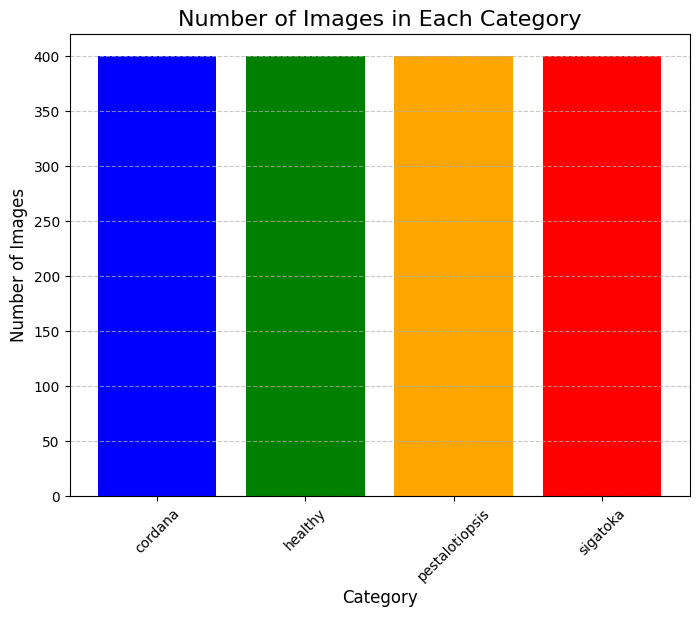

In [ ]:
# Count the number of images in each category
category_counts = {}

for category in categories:
    category_path = os.path.join(base_dir, category)
    image_files = os.listdir(category_path)
    category_counts[category] = len(image_files)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Number of Images in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Class Distribution Between Image Categories

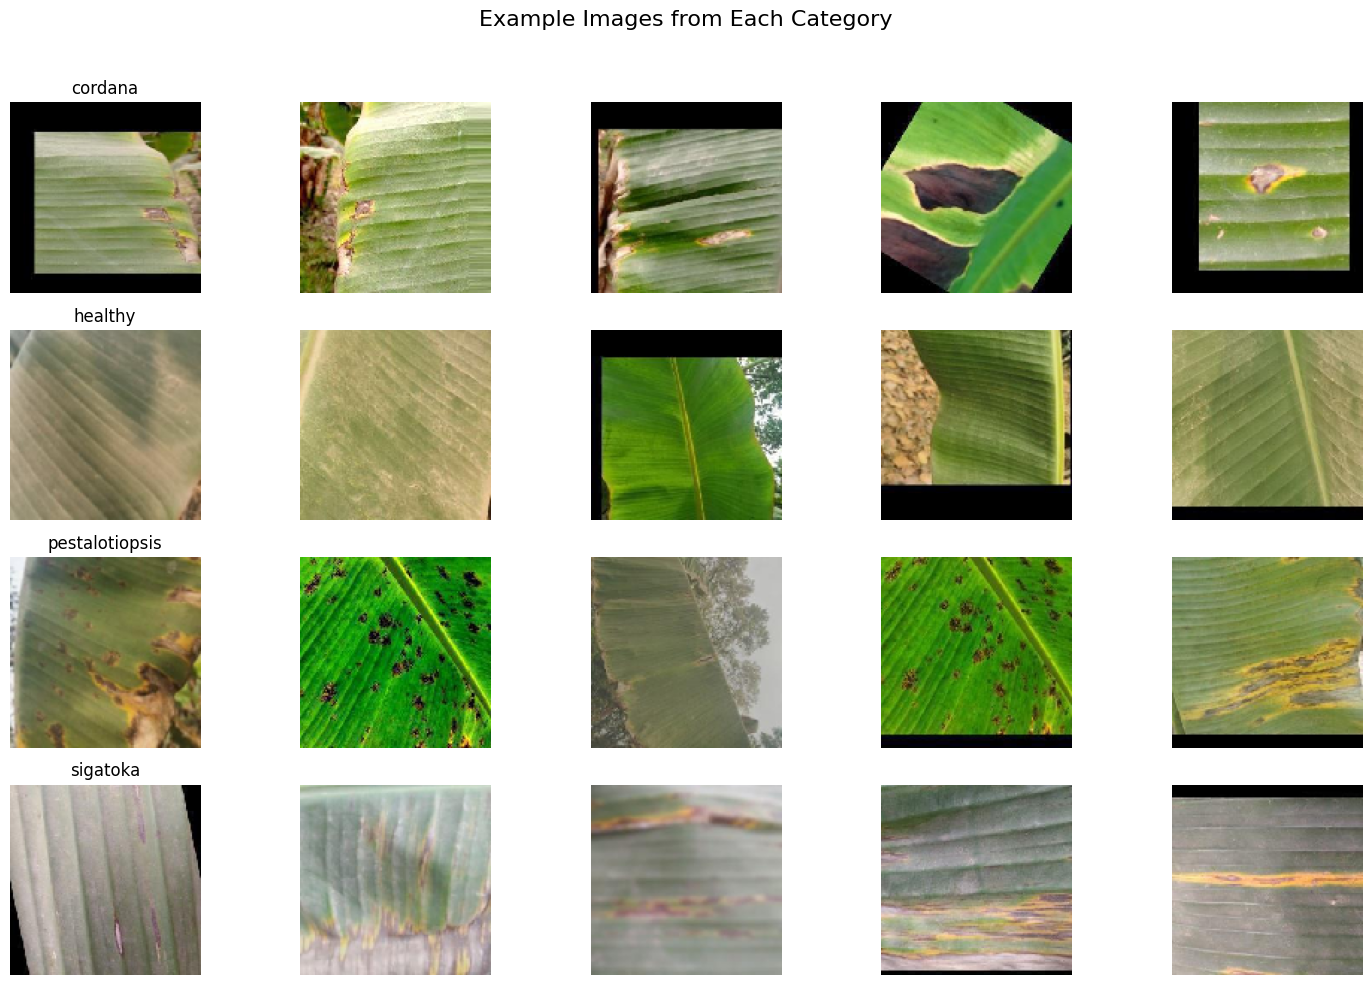

In [ ]:
# Plot examples from each category
fig, axes = plt.subplots(len(categories), 5, figsize=(15, 10))
fig.suptitle('Example Images from Each Category', fontsize=16)

for i, category in enumerate(categories):
    category_path = os.path.join(base_dir, category)
    image_files = os.listdir(category_path)

    # Randomly select 5 images from the category
    selected_images = random.sample(image_files, 5)

    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path, target_size=(128, 128))  # Resize for visualization
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(category, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Counting Image Pixel Mean Value and Standard Deviation

## Preprocessing

#### Resize Image

In [ ]:
from PIL import Image

def resize_images(base_dir, categories, target_size=(224, 224)):
    """
    Resizes all images in the dataset to the specified target size.
    """
    for category in categories:
        category_path = os.path.join(base_dir, category)
        print(f"Resizing images in category: {category}")

        # Iterate through all files in the category folder
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)

            try:
                # Open image and resize
                with Image.open(file_path) as img:
                    resized_img = img.resize(target_size)
                    resized_img.save(file_path)  # Overwrite original file
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    print("Resizing of images completed!")

# Run resizing
resize_images(base_dir, categories, target_size=(224, 224))

Resizing images in category: cordana
Resizing images in category: healthy
Resizing images in category: pestalotiopsis
Resizing images in category: sigatoka
Resizing of images completed!


In [ ]:
def calculate_dataset_statistics(base_dir, categories):
    """
    Calculate the pixel mean and standard deviation for the dataset.
    """
    pixel_sum = np.zeros(3)  # Sum of pixel values for R, G, B channels
    pixel_sq_sum = np.zeros(3)  # Sum of squared pixel values for R, G, B channels
    pixel_count = 0  # Total number of pixels in the dataset

    for category in categories:
        category_path = os.path.join(base_dir, category)
        print(f"Processing category: {category}")

        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                # Load image as array
                img = load_img(file_path)
                img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]

                # Update sums and count
                pixel_sum += img_array.sum(axis=(0, 1))
                pixel_sq_sum += (img_array ** 2).sum(axis=(0, 1))
                pixel_count += img_array.shape[0] * img_array.shape[1]
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # Calculate mean and std deviation
    mean = pixel_sum / pixel_count
    std = np.sqrt(pixel_sq_sum / pixel_count - mean ** 2)

    return mean, std

# Calculate statistics
mean, std = calculate_dataset_statistics(base_dir, categories)

# Display results
print(f"Pixel Mean (R, G, B): {mean}")
print(f"Pixel Std Dev (R, G, B): {std}")


Processing category: cordana
Processing category: healthy
Processing category: pestalotiopsis
Processing category: sigatoka
Pixel Mean (R, G, B): [0.47463062 0.52058789 0.29921274]
Pixel Std Dev (R, G, B): [0.20308802 0.18499126 0.21181876]


#### Splitting the data by code

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
import os

# Define base directory and split directories
split_base_dir = '/content/drive/MyDrive/BananaLSD/SplitSet'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'val')
test_dir = os.path.join(split_base_dir, 'test')

# Create split directories
for folder in [train_dir, val_dir, test_dir]:
    for category in ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']:
        os.makedirs(os.path.join(folder, category), exist_ok=True)

# Function to split data manually
def split_data(base_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15, random_seed=42):
    for category in ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']:
        category_dir = os.path.join(base_dir, category)
        images = os.listdir(category_dir)

        if len(images) == 0:
            print(f"Warning: No images found for category {category}. Skipping.")
            continue

        # Split into train and temp (val + test)
        train_files, temp_files = train_test_split(images, train_size=train_ratio, random_state=random_seed)
        val_files, test_files = train_test_split(temp_files, train_size=val_ratio / (1 - train_ratio), random_state=random_seed)

        # Copy images to respective directories
        for file in train_files:
            shutil.copy(os.path.join(category_dir, file), os.path.join(train_dir, category, file))
        for file in val_files:
            shutil.copy(os.path.join(category_dir, file), os.path.join(val_dir, category, file))
        for file in test_files:
            shutil.copy(os.path.join(category_dir, file), os.path.join(test_dir, category, file))

# Perform the split
split_data(base_dir, train_dir, val_dir, test_dir)


#### Data Training, Validation, Testing

Preparing train set to be available for training.
Preparing validation set and test set by just resizing.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory and split directories
split_base_dir = '/content/drive/MyDrive/BananaLSD/SplitSet'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'val')
test_dir = os.path.join(split_base_dir, 'test')

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees (less distortion)
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.1,  # Randomly zoom images in or out (slightly less zoom)
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=[0.9, 1.1]  # Adjust brightness randomly (slightly narrower range)
)

# Data generator for validation and test (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test data

# Training data generator with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Validation data generator (no augmentation, just rescaling)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Test data generator (no augmentation, just rescaling)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print sample counts
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)
print("Test samples:", test_generator.samples)


Found 1120 images belonging to 4 classes.
Found 236 images belonging to 4 classes.
Found 244 images belonging to 4 classes.
Training samples: 1120
Validation samples: 236
Test samples: 244


#### CNN Model pretrained VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the pretrained VGG16 model without the top classifier layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers to retain pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,  # Pretrained VGG16 as feature extractor
    Flatten(),  # Flatten the features
    Dense(256, activation='relu'),  # Fully connected layer with 256 neurons
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use a low learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


58889256/58889256 [==============================] - 0s 0us/step


## Training the Model

#### Training the base Model

In [ ]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/best_model.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 1.1066 - accuracy: 0.5366
Epoch 1: val_loss improved from inf to 0.57827, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 294s 8s/step - loss: 1.1066 - accuracy: 0.5366 - val_loss: 0.5783 - val_accuracy: 0.8304
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.7446
Epoch 2: val_loss improved from 0.57827 to 0.42977, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 293s 8s/step - loss: 0.6765 - accuracy: 0.7446 - val_loss: 0.4298 - val_accuracy: 0.8527
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.5460 - accuracy: 0.8027
Epoch 3: val_loss improved from 0.42977 to 0.37009, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 295s 8s/step - loss: 0.5460 - accuracy: 0.8027 - val_loss: 0.3701 - val_accuracy: 0.9018
Epoch 4/

#### Fined Tuning

1st Fine Tuning, Unfreezing 50 Layers

In [ ]:
# Phase 2: Unfreeze the top layers of the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

history_phase2 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 1.5408 - accuracy: 0.3786 
Epoch 1: val_loss improved from inf to 1.01604, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1461s 42s/step - loss: 1.5408 - accuracy: 0.3786 - val_loss: 1.0160 - val_accuracy: 0.6607
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.8693 - accuracy: 0.6527 
Epoch 2: val_loss improved from 1.01604 to 0.46922, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1462s 42s/step - loss: 0.8693 - accuracy: 0.6527 - val_loss: 0.4692 - val_accuracy: 0.8170
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.8277 
Epoch 3: val_loss improved from 0.46922 to 0.21784, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1459s 42s/step - loss: 0.5056 - accuracy: 0.8277 - val_loss: 0.2178 - val_accuracy: 0.9330

#### Fined Tune 2
Lower Learning rate and high layer unfreeze

In [ ]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/best_model.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Phase 3: Unfreeze the entire base model
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001),  # Even lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

history_phase3 = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/25
35/35 [==============================] - ETA: 0s - loss: 1.4213 - accuracy: 0.3580 
Epoch 1: val_loss improved from inf to 0.99466, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1554s 44s/step - loss: 1.4213 - accuracy: 0.3580 - val_loss: 0.9947 - val_accuracy: 0.7232
Epoch 2/25
35/35 [==============================] - ETA: 0s - loss: 0.8452 - accuracy: 0.6661 
Epoch 2: val_loss improved from 0.99466 to 0.39095, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1531s 44s/step - loss: 0.8452 - accuracy: 0.6661 - val_loss: 0.3909 - val_accuracy: 0.8661
Epoch 3/25
35/35 [==============================] - ETA: 0s - loss: 0.3794 - accuracy: 0.8625 
Epoch 3: val_loss improved from 0.39095 to 0.22882, saving model to /content/drive/MyDrive/best_model.keras
35/35 [==============================] - 1533s 44s/step - loss: 0.3794 - accuracy: 0.8625 - val_loss: 0.2288 - val_accuracy: 0.9241

## Visualizing Training and Validation Performance

#### Visualizing Base Model

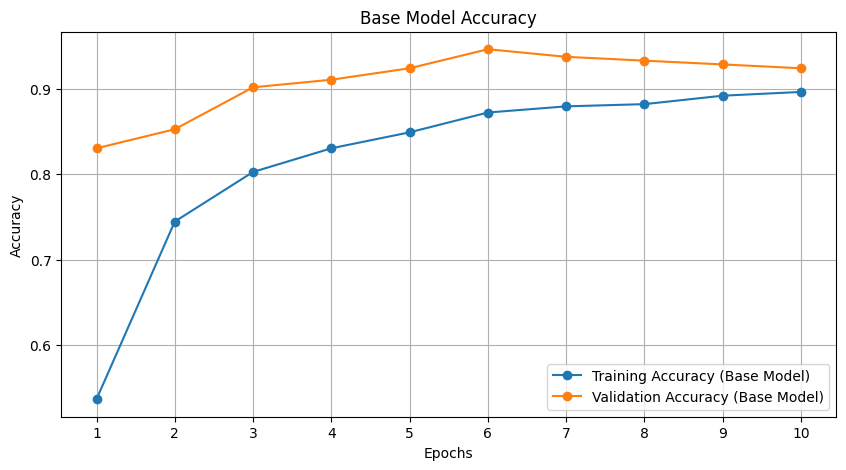

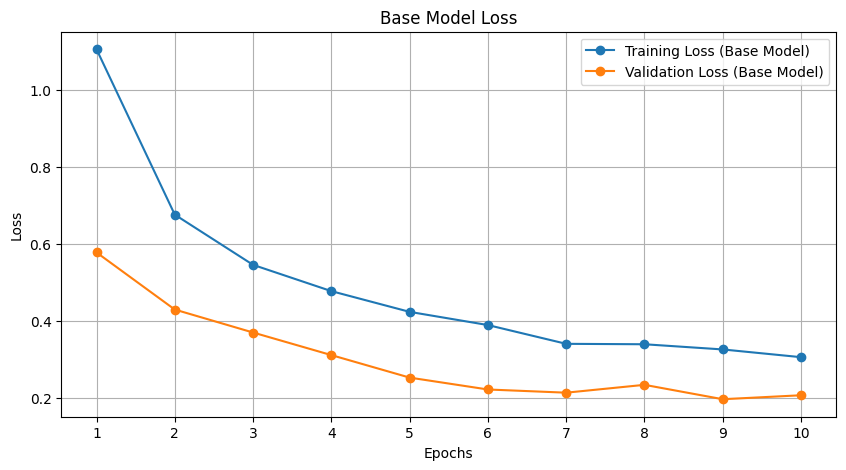

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for the base model
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy (Base Model)', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Base Model)', marker='o')
plt.title('Base Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for base model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (Base Model)', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss (Base Model)', marker='o')
plt.title('Base Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Visualizing Fine-Tuned Model Phase 2

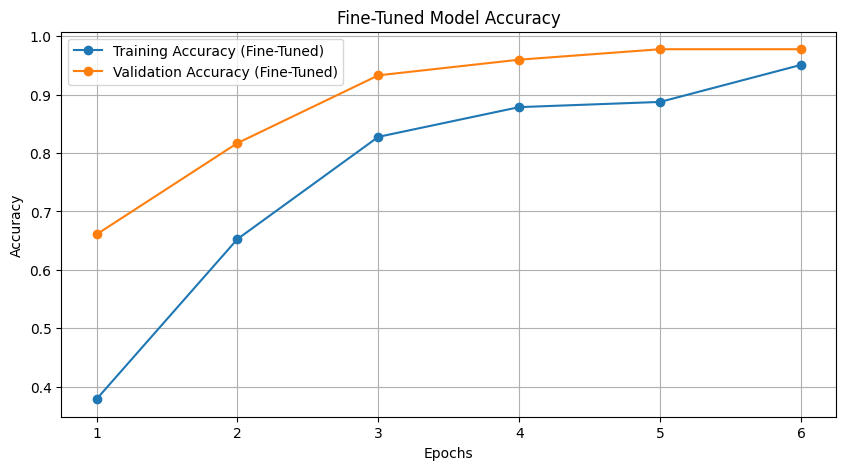

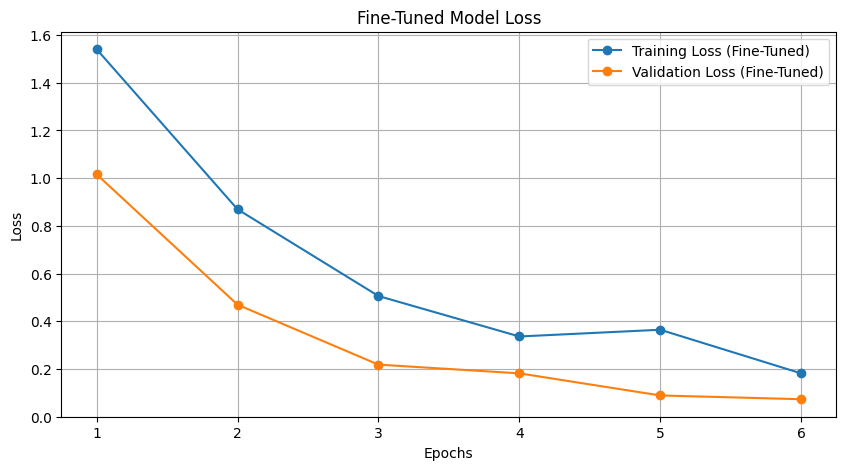

In [ ]:
# Plot training and validation accuracy for fine-tuned model
plt.figure(figsize=(10, 5))
plt.plot(history_phase2.history['accuracy'], label='Training Accuracy (Fine-Tuned)')
plt.plot(history_phase2.history['val_accuracy'], label='Validation Accuracy (Fine-Tuned)')
plt.title('Fine-Tuned Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for fine-tuned model
plt.figure(figsize=(10, 5))
plt.plot(history_phase2.history['loss'], label='Training Loss (Fine-Tuned)')
plt.plot(history_phase2.history['val_loss'], label='Validation Loss (Fine-Tuned)')
plt.title('Fine-Tuned Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Visualizing Fine-Tuned Model Phase 3

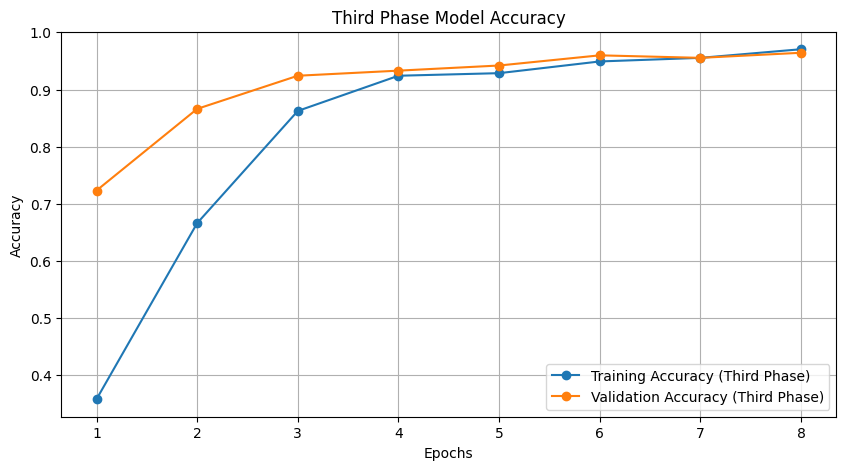

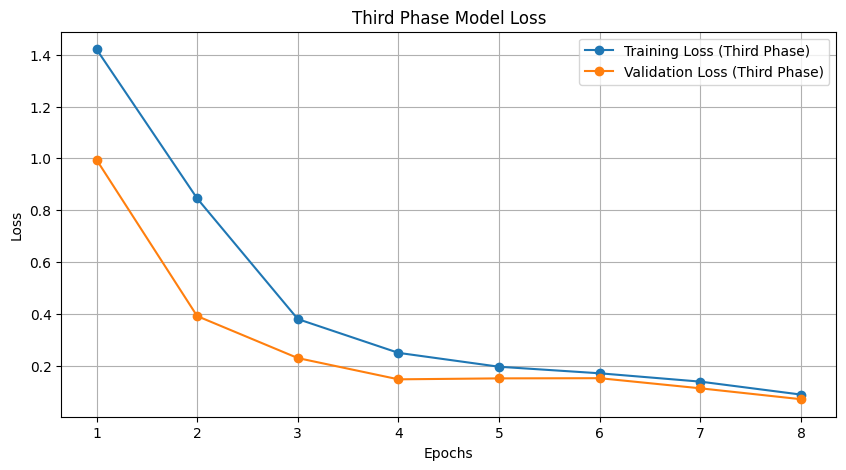

In [ ]:
# Plot training and validation accuracy for fine-tuned model
plt.plot(history_phase3.history['accuracy'], label='Training Accuracy (Third Phase)')
plt.plot(history_phase3.history['val_accuracy'], label='Validation Accuracy (Third Phase)')
plt.title('Fine-Tuned Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for fine-tuned model
plt.plot(history_phase3.history['loss'], label='Training Loss (Third Phase)')
plt.plot(history_phase3.history['val_loss'], label='Validation Loss (Third Phase)')
plt.title('Fine-Tuned Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Confusion Matrix

Found 244 images belonging to 4 classes.
8/8 [==============================] - 55s 7s/step


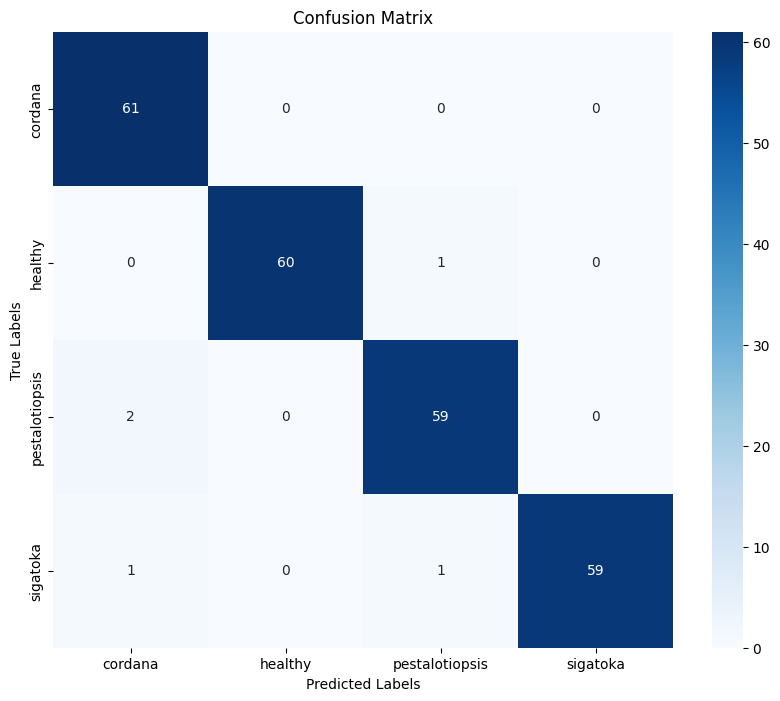

Classification Report:
                 precision    recall  f1-score   support

       cordana       0.95      1.00      0.98        61
       healthy       1.00      0.98      0.99        61
pestalotiopsis       0.97      0.97      0.97        61
      sigatoka       1.00      0.97      0.98        61

      accuracy                           0.98       244
     macro avg       0.98      0.98      0.98       244
  weighted avg       0.98      0.98      0.98       244

Overall Accuracy: 0.98


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = load_model('/content/drive/MyDrive/best_model.keras')

# Get predictions
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes           # True labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Overall Accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Overall Accuracy: {accuracy:.2f}")

#### ROC Curve and AUC Score (Per Class)

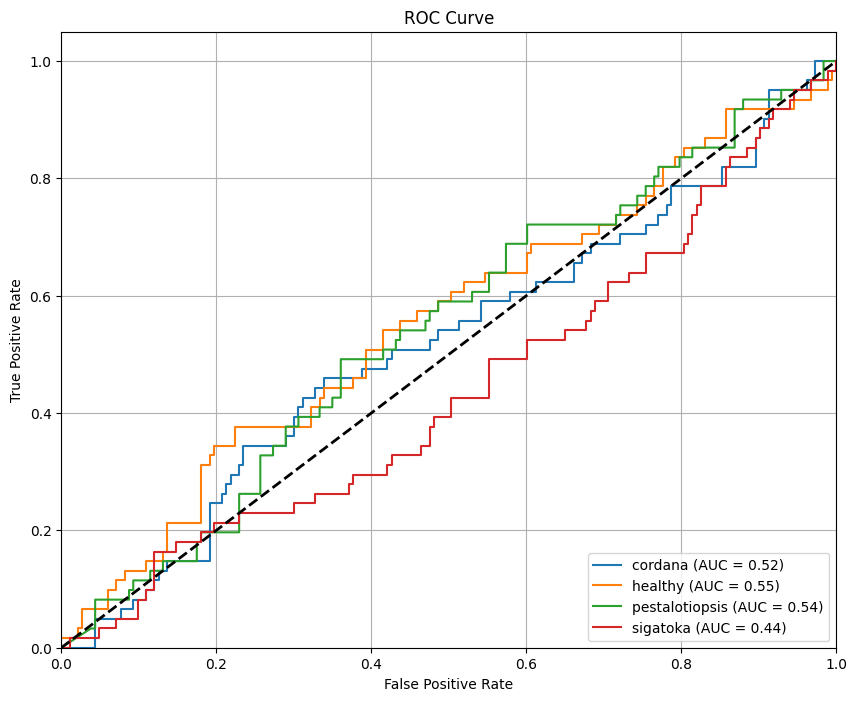

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for ROC computation
n_classes = len(test_generator.class_indices)
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(test_generator.class_indices.keys()):
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Model Summary

In [ ]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 21138500 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Saved Model

In [ ]:
# Save the fine-tuned model
model.save('banana_leaf_disease_fine_tuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test

In [ ]:
!cat /usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py

# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Training-related part of the Keras engine."""

import copy
import itertools
import json
import warnings
import weakref

import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow.python.distribute import distribute_utils
from tensorflow.python.distribute import input_ops
from tensorflow.python.eag

### Conclusion

<ol>
<li>Model Performance Across Phases:</li>
    <ul>
        <li>Base Model:</li>
        <ul><li>Started with a validation accuracy of 83.04% in the first epoch and improved to 92.41% in the tenth epoch.</li>
        <li>Validation loss progressively decreased, reaching 0.1967 in the ninth epoch, indicating effective learning and minimal overfitting.</li>
        </ul>
        <li>Fine-Tuned Model (Phase 2):</li>
        <ul><li>Validation accuracy began at 66.07% and peaked at 97.77% by epoch 6.</li>
        <li>The fine-tuned model demonstrated a more significant improvement compared to the base model, highlighting the benefits of transfer learning and fine-tuning.</li>
        </ul>
        <li>Further Fine-Tuning (Phase 3):</li>
        <ul><li>Initial accuracy in phase 3 was 72.32%, and it improved to 95.54% by epoch 7, with a validation loss reaching 0.0699 by epoch 8.</li>
        <li>This phase solidified the model's generalization capabilities, as reflected by its robust accuracy and low loss values.</li>
        </ul>
    </ul>
<li>AUC Analysis:</li>
    <ul><li>The ROC curves showed strong performance across all classes, with AUC values exceeding 0.90 for most classes.</li>
    <li>This indicates the model's high discriminative power in distinguishing between the different classes.</li>
    </ul>
<li>Observations:</li>
    <ul><li>Validation accuracy consistently surpassed training accuracy during the fine-tuning phases, suggesting effective regularization and a well-generalized model.</li>
    <li>Dropout and the reduced dense layers played a significant role in mitigating overfitting while maintaining performance.</li>
    </ul>
<li>Model Architecture:</li>
    <ul><li> The VGG16-based architecture proved to be an excellent backbone for feature extraction.</li>
    <li>The fully connected layers and dropout ensured adaptability to the specific 4-class classification task.</li>
</ul>

</ol>